In [2]:
#Importing the needed packages
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import random
import time
import os
import math

In [100]:
start = time.time()
expedia_df = pd.read_csv('training_set_VU_DM_2014.csv')
#test_df = pd.read_csv('test_set_VU_DM_2014.csv')
print('Loading dataset took {} seconds'.format(time.time()-start))

Loading dataset took 24.381248235702515 seconds


In [4]:
expedia_df.shape

(4958347, 54)

In [105]:
expedia_df.head(20)

srch_id            date_time  site_id  visitor_location_country_id  \
0         1  2013-04-04 08:32:15       12                          187   
1         1  2013-04-04 08:32:15       12                          187   
2         1  2013-04-04 08:32:15       12                          187   
3         1  2013-04-04 08:32:15       12                          187   
4         1  2013-04-04 08:32:15       12                          187   
5         1  2013-04-04 08:32:15       12                          187   
6         1  2013-04-04 08:32:15       12                          187   
7         1  2013-04-04 08:32:15       12                          187   
8         1  2013-04-04 08:32:15       12                          187   
9         1  2013-04-04 08:32:15       12                          187   
10        1  2013-04-04 08:32:15       12                          187   
11        1  2013-04-04 08:32:15       12                          187   
12        1  2013-04-04 08:32:15       12                          187   
13        1  2013-04-04 08:32:15       12                          187   
14        1  2013-04-04 08:32:15       12                          187   
15        1  2013-04-04 08:32:15       12                          187   
16        1  2013-04-04 08:32:15       12                          187   
17        1  2013-04-04 08:32:15       12                          187   
18        1  2013-04-04 08:32:15       12                          187   
19        1  2013-04-04 08:32:15       12                          187   

    visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                       NaN                   NaN              219      893   
1                       NaN                   NaN              219    10404   
2                       NaN                   NaN              219    21315   
3                       NaN                   NaN              219    27348   
4                       NaN                   NaN              219    29604   
5                       NaN                   NaN              219    30184   
6                       NaN                   NaN              219    44147   
7                       NaN                   NaN              219    50984   
8                       NaN                   NaN              219    53341   
9                       NaN                   NaN              219    56880   
10                      NaN                   NaN              219    59267   
11                      NaN                   NaN              219    59526   
12                      NaN                   NaN              219    68914   
13                      NaN                   NaN              219    74474   
14                      NaN                   NaN              219    81437   
15                      NaN                   NaN              219    85728   
16                      NaN                   NaN              219    88096   
17                      NaN                   NaN              219    88127   
18                      NaN                   NaN              219    88218   
19                      NaN                   NaN              219    89073   

    prop_starrating  prop_review_score      ...       comp6_rate_percent_diff  \
0                 3                3.5      ...                           NaN   
1                 4                4.0      ...                           NaN   
2                 3                4.5      ...                           NaN   
3                 2                4.0      ...                           NaN   
4                 4                3.5      ...                           NaN   
5                 4                4.5      ...                           NaN   
6                 3                3.5      ...                           NaN   
7                 2                0.0      ...                           NaN   
8                 4                4.0      ...             

In [62]:
var_list = ['date_time','site_id','visitor_location_country_id','visitor_hist_starrating','visitor_hist_adr_usd','srch_id',
            'comp1_rate','comp1_inv','comp1_rate_percent_diff',
            'comp2_rate','comp2_inv','comp2_rate_percent_diff',
            'comp3_rate','comp3_inv','comp3_rate_percent_diff',
            'comp4_rate','comp4_inv','comp4_rate_percent_diff',
            'comp5_rate','comp5_inv','comp5_rate_percent_diff',
            'comp6_rate','comp6_inv','comp6_rate_percent_diff',
            'comp7_rate','comp7_inv','comp7_rate_percent_diff',
            'comp8_rate','comp8_inv','comp8_rate_percent_diff']
data = expedia_df[var_list]

In [7]:
sample_data = data.sample(10000)
expedia_df = expedia_df.sample(10000)

([<matplotlib.axis.XTick at 0x7f2e3a8f0b38>,
 <a list of 30 Text xticklabel objects>)

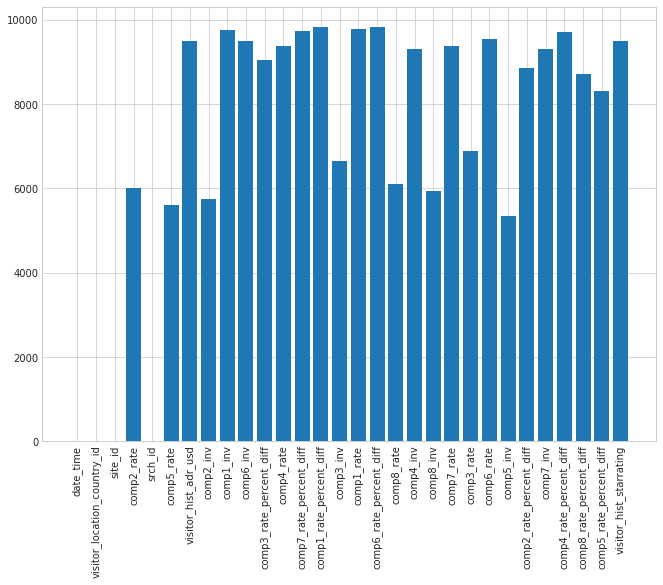

In [7]:
def get_null(prop,data):
    return sum(pd.isnull(data[prop]))

d = {prop: get_null(prop,sample_data) for prop in list(sample_data.keys())}
fig,ax = plt.subplots()
fig.set_size_inches(11,8)
plt.bar(range(len(d)),d.values(),align='center')
plt.xticks(range(len(d)),d.keys(),rotation=90)

In [71]:
comp_vars = var_list[6:]
all_vars = list(expedia_df.keys())

In [70]:
# PLOT COOCCURRENCE MATRIX

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''

    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)
        
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False,rotation=90)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    #show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    #ax.xaxis.tick_top()

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(40, 20))

def plot_coocurrance(data,*variables):
    var_data = data[list(variables)]
    (r,c) = var_data.shape
    M = np.zeros((r,c))
    for i in range(r):
        M[i,:]= [int(not x) for x in pd.isnull(var_data.iloc[i,:])]
    cooc_matrix = np.dot(M.transpose(), M)
    cooc_diag = np.diagonal(cooc_matrix)
    with np.errstate(divide='ignore', invalid='ignore'):
        cooc_percent = np.nan_to_num(np.true_divide(cooc_matrix, cooc_diag[:, None]))
    (x_ax_size, y_ax_size) = cooc_percent.shape
    title = 'Co-occurrence matrix\n'
    xlabel = ''
    ylabel = ''
    xticklabels = variables
    yticklabels = variables
    heatmap(cooc_percent, title, xlabel, ylabel, xticklabels, yticklabels)
    plt.show()
    
    
#plot_coocurrance(sample_data, *var_list[5:])
#plot_coocurrance(expedia_df, *all_vars) 

In [19]:
def violin_plot(data, var_name, name, lolim=None, hilim=None):
    accs = []
    if lolim and not hilim:
        plt.ylim(ymin=lolim)
    elif hilim and not lolim:
        plt.ylim(ymax=hilim)
    elif hilim and lolim:
        plt.ylim(lolim, hilim)
    ax = sns.violinplot(y=data[var_name])
    plt.ylabel(var_name)
    plt.title('{}'.format(name))
    #plt.savefig(name+'_fold.png')
    plt.show()

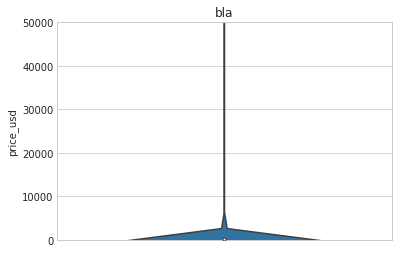

In [20]:

violin_plot(expedia_df, 'price_usd', 'bla',hilim=1000)

In [92]:
expedia_df.head()

srch_id            date_time  site_id  visitor_location_country_id  \
270919     18144  2013-05-06 20:22:23        5                          219   
4647660   311769  2013-06-03 20:16:13       24                          216   
1658838   111425  2013-04-23 15:28:34       14                          100   
4614921   309639  2013-02-08 17:41:05        5                          219   
796621     53286  2013-01-03 21:00:03       32                          220   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
270919                       NaN                   NaN              219   
4647660                      NaN                   NaN              219   
1658838                      NaN                   NaN              100   
4614921                      NaN                   NaN              219   
796621                       NaN                   NaN               55   

         prop_id  prop_starrating  prop_review_score      ...       \
270919    111449                2                4.0      ...        
4647660   115625                4                4.5      ...        
1658838    53390                3                3.5      ...        
4614921   102040                3                4.5      ...        
796621     66347                5                4.5      ...        

         comp6_rate_percent_diff  comp7_rate  comp7_inv  \
270919                       NaN         NaN        NaN   
4647660                      NaN         NaN        NaN   
1658838                      NaN         NaN        NaN   
4614921                      NaN         NaN        NaN   
796621                       NaN         NaN        NaN   

         comp7_rate_percent_diff  comp8_rate  comp8_inv  \
270919                       NaN         NaN        NaN   
4647660                      NaN         0.0        0.0   
1658838                      NaN         1.0        0.0   
4614921                      NaN         NaN        NaN   
796621                       NaN         NaN        NaN   

         comp8_rate_percent_diff  click_bool  gross_bookings_usd  booking_bool  
270919                       NaN           0                 NaN             0  
4647660                      NaN           0                 NaN             0  
1658838                     12.0           0                 NaN             0  
4614921                      NaN           0                 NaN             0  
796621                       NaN           0                 NaN             0  

[5 rows x 54 columns]

In [25]:
varss = np.array(comp_vars)
sorts = np.array([0,3,6,9,12,15,18,21,1,4,7,10,13,16,19,22,2,5,8,11,14,17,20,23])
ordered_comp_vars = varss[sorts]

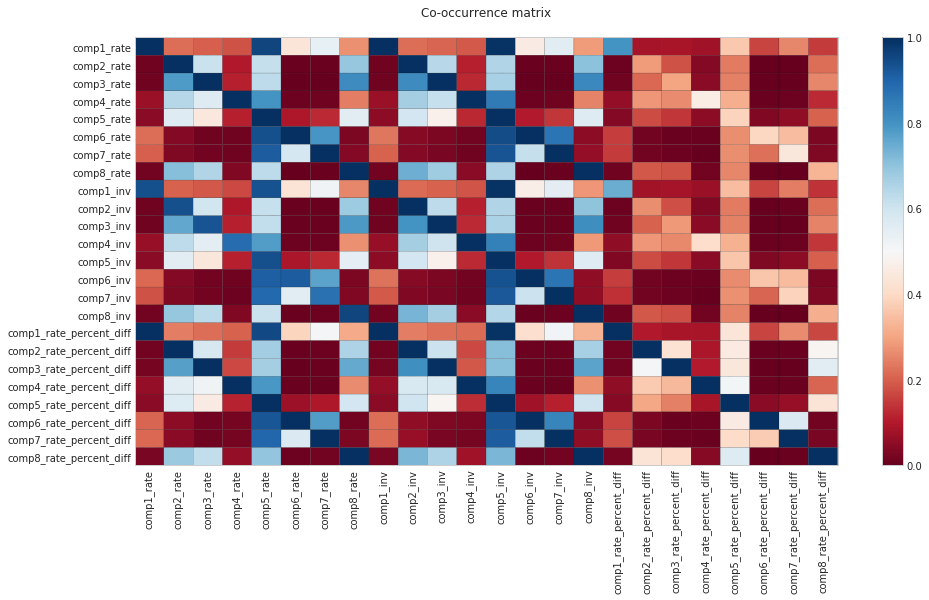

In [33]:
plot_coocurrance(sample_data, *ordered_comp_vars)

In [101]:
import math
def combine_comps(data, comp_vars):
    
    def combine_rate_or_inv(row, is_inv):
        if is_inv:
            print('inv!',row)
        non_null = [x for x in row if not math.isnan(x)]
        if len(non_null) != 0:
            return sum(non_null)/len(non_null)
        else:
            return None
    
    def combine_percent_diff(percent, signs):
        rel_dif = np.array(percent) * np.array(signs)
        rel_diff = [x for x in rel_dif if not math.isnan(x)]
        if len(rel_diff) != 0:
            return sum(rel_diff)/len(rel_diff)
        else:
            return None

    rate_vars = [x for x in comp_vars if 'rate' in x and 'percent' not in x]
    inv_vars  = [x for x in comp_vars if 'inv'  in x]
    percent_vars = [x for x in comp_vars if 'percent' in x]
    print(rate_vars)
    print(inv_vars)
    print(percent_vars)
    comp_rate = []
    comp_inv = []
    comp_diff = []
    for i,row in enumerate(data[rate_vars].values):
        comp_rate.append(combine_rate_or_inv(row,False))
        comp_inv.append(combine_rate_or_inv(data[inv_vars].values[i],True))
    
    for i,row in enumerate(data[percent_vars].values):
        signs = data[rate_vars].values[i]
        comp_diff.append(combine_percent_diff(row, signs))
    data['comp_rate'] = comp_rate
    data['comp_inv'] = comp_inv
    data['comp_diff'] = comp_diff
    print('Done')
    return data


def remove_comp_outliers(data, *variables):
    # Removes outliers from the percent_diff set. Only high-end outliers are removed
    for var in variables:
        median = data[var].median()
        quantile = data[var].quantile(0.9)
        thresh = median + (1.5*(quantile-median))
        removed_outliers = []
        for i,point in enumerate(data[var].values):
            if not math.isnan(point):
                if point > thresh:
                    removed_outliers.append(None)
                else:
                    removed_outliers.append(point)
            else:
                removed_outliers.append(None)
        data[var] = removed_outliers
    return data

def normalize(data, variable):
    d = data[variable]
    mean = np.mean(d)
    norm_d = [(x-mean)/mean for x in d]
    data[variable] = norm_d
    return data
sample_data = expedia_df.sample(100000)
sample_data =  remove_comp_outliers(sample_data, *[x for x in comp_vars if 'percent' in x])
sample_data = combine_comps(sample_data, comp_vars)
#print(sample_data.head())

['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate']
['comp1_inv', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv']
['comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff']
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. n

inv! [nan  0. -1. nan -1. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 1. nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan -1.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0.  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0.  1.  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan  1. nan nan  1.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0.  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0. nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0.  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0.

inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  1.  1.  1.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  1. nan nan nan nan]
inv! [nan  0. nan nan  0. nan  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan  0.  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan  1. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan -1.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan  0.  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan -1. -1.  1. -1. nan nan -1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  1. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  1.  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0. nan  0. nan  0.

inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [ 0.  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  1.  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan -1. -1.  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0.

inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  1.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan -1. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan -1. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  1.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. -1. nan  0. nan nan -1.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [ 0. nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  1.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  1. nan nan]
inv! [ 0. nan nan nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0. nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [-1. nan nan nan nan -1. -1. nan]
inv! [nan  0.  0. nan  1. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0.

inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan  0. nan nan  0. nan  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan  0.  0. nan nan  1.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [ 1. nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan -1. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0.  0. nan nan  0.]
inv! [nan nan  1. nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  1. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  1. nan nan nan nan nan  0.]
inv! [ 1. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [ 0.  0. nan  0.  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  1. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0.  1.  0. nan nan  0.]
inv! [nan nan  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  1.  0. nan]
inv! [nan  1.  1.  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1. nan nan  1. nan nan  1.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  1.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  1.  1. nan nan nan nan  1.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan  0.  1. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0.  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan -1. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  1.  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0.  1.  1. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  1. nan nan  0.]
inv! [-1. nan nan nan -1. nan -1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  1.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan -1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan -1. nan nan nan nan nan -1.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  1. nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1.  1. nan nan nan nan  1.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan -1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan -1. -1. -1. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  1. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  1. nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [ 0.  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. -1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. -1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  1.  1.  1. nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  1. nan  1.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  1. nan nan  1. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan  0. nan nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  1. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan -1. -1. -1. nan]
inv! [nan  1. nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0.  0. nan  0.  0. nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  1.  0. nan]
inv! [nan nan  0. nan  0.

inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1.  0.  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  1. nan]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan -1. nan nan nan nan  1.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan nan  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan  1. nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  1. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan  1.  0. nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. -1. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  1.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan  0.  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  1.  0.  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan  0.  0.

inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [ 0. nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  1.  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0.  1.  0. nan nan  1.]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan  0.  0.  0.  0. nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  1. nan nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan -1. -1. -1. nan]
inv! [nan  1.  1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0.  0.  1. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. -1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1.  1. nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  1.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  1. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0.  1.  1.

inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  1.  0.  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0.  0.  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  1. nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan  0. nan]
inv! [ 0. nan  1. nan  0.  0.  0.  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0.

inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. -1. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [ 0.  0. nan  1.  0. nan nan  0.]
inv! [nan nan nan nan  0.

inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan -1. -1. nan nan nan nan -1.]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan  0.  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1.  0.  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0.  0. nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [ 0. nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  1.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan -1.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0.  1.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan  0.  0.  0.  1. nan nan  0.]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan  1.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0.  1. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan nan]
inv! [nan  1. nan  0.  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [ 0.  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  1.  1. nan nan nan nan  1.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan -1.]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  1.  1.  1. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  1. nan  0.  0.  0. nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan -1. -1. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan  0. nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan  0.  1. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  1. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  1. nan  1. nan nan  1.]
inv! [nan nan nan nan -1. nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan nan nan nan  1.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0.  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0.  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1.  0. nan nan nan nan -1.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan  0. nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan -1. nan -1. nan]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  1. nan nan  1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan  1.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. -1. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  1.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan  0.  0.

inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0. nan nan nan

inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  1.  0. nan nan nan]
inv! [nan nan  0. nan  0. nan  0.  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  1.  1.  0. nan nan nan]
inv! [nan nan nan nan  1.  1. nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  1. nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  1.  1. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan -1. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan  0.  0.

inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  1.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan  0. nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0.

inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  1. nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan -1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan -1. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan nan nan nan  1.]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [ 0.  0.  0.  0.  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan -1.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  1.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  1.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  1. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [ 0.  0.  1. nan  1. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  1.  1. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0.  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. -1. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  1.  0.  1.  1. nan nan  1.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  1. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1. nan nan nan nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1. nan nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan nan nan nan nan -1.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan  0.  1.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan  1. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  1.  1.  1.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan  1. nan nan  1.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  1. nan  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  1.]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  1.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan -1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0.  1.  0.  0. nan nan nan]
inv! [nan nan nan nan -1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan -1. nan nan nan nan -1.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan  0.

inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. -1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan  0. nan  0. nan nan  0.]
inv! [nan  1. nan nan  0. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  1.  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  1.  1. nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0.  0.  0.  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0.  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan -1. nan nan nan nan]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  1.  1.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0.  0. nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0.

inv! [nan  0.  0.  0.  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. -1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan  1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan  0. nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan -1. nan nan -1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan -1. nan nan -1. nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 1. nan nan nan  1.  1.  1. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan  1. nan nan nan nan]
inv! [nan nan nan nan  0.  1. nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  1. nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 1. nan nan nan  1. nan  0. nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  1. nan  1.  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan  0. nan  0.  0.  0.  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1.  0.  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  1. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan nan -1. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  1.

inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan nan -1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan -1. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan -1. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan nan

inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0. nan nan nan nan]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan  0.  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  1. nan nan  0.  1.  0. nan]
inv! [nan  0.  0. nan nan nan nan  1.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan  0.  1. nan  1. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  1.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  1. nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  1. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan

inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  1. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0.  1.  0.  1.  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0.

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan -1. -1. nan -1. nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0.  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  1.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  1.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan -1.]
inv! [nan  0. nan nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan -1. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 1. nan nan nan  1.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1.  1.  0.  0. nan nan nan]
inv! [nan nan nan nan  1. nan  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  1. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan  0.  0.  0. nan nan]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  1.  0. nan nan nan nan nan]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  1.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan  1.  0. nan nan nan]
inv! [ 0.  0.  0. nan  1.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  1.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan  1.  0.  0.  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan -1. -1.

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan -1. nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan -1. -1. nan nan nan nan -1.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 1. nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  1. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  1.]
inv! [nan -1. nan nan -1. nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  1. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan  0. nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  1. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0. nan  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan -1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan  1. nan]
inv! [nan nan nan nan  1. nan nan  0.]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [ 0.  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0.  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0.

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan  0.  1.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. -1. nan nan nan nan -1.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0.  0.  1. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan nan nan]
inv! [ 0.  0.  0.  0.  1. nan nan  0.]
inv! [nan nan nan nan  0.  1.  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 1. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [ 1. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  1. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  1.  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan  0.  1. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan nan -1. nan nan -1.]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  1. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan  0.  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0. nan  0.  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan -1. nan nan nan nan]
inv! [nan nan nan nan -1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [ 1.  0.  0.  0.  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan -1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan  1.  1.  1.  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [ 1. nan nan nan  1.  0.  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0. nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan nan nan

inv! [nan nan  0. nan  1. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan -1. -1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan nan  0.  1. nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1.  1. nan nan nan  0.]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  1.  0. nan  0.

inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan -1. nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [ 0. nan nan nan  0.  0.  1. nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [-1. nan -1. nan nan nan nan -1.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  1.  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1.  1. nan  0. nan nan  1.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan -1. nan -1. -1. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [ 0.  0. nan  0.  0. nan nan  0.]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  1. nan nan nan nan  1.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan -1. nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  1.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan -1. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  1.]
inv! [nan nan nan nan  1.  0.  1. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan -1. -1. nan  0. nan nan -1.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan  0. nan nan nan]
inv! [ 0. nan  0.  0.  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan  1.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  1. nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan  0.  0.]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan  1. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan -1. nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0. nan  1. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0.

inv! [nan nan  0. nan  1. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan  0. nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. -1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  1.  0. nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  1.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  1.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan -1. nan nan -1.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan  0. nan  1.  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan  0. nan nan  1. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan -1. nan nan nan nan nan nan]
inv! [nan  1.  1. nan nan nan nan  1.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  1. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  1. nan nan  1. nan nan  1.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1.  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0.  0.  0. nan  0.

inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan  0.  0.  0. nan nan  0.]
inv! [nan nan -1. nan nan nan nan -1.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan  0. nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  1.  0. nan nan nan nan  0.]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  1. nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan  1.  1. nan nan  1.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0.  0.  0.  0.  1. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  1.  0.  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan  1. nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0.

inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0. nan  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [ 0.  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  1.

inv! [nan nan nan nan nan nan nan  0.]
inv! [ 0. nan nan nan  0.  0.  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan -1. nan nan -1. nan nan -1.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan  1.  0. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan  0. nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1.  1. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan -1.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [ 0.  0.  0.  0.  1. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  1.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan  0.  0.  1. nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [ 0. nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  1. nan nan nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0.  0. nan nan nan nan]
inv! [nan -1. -1. nan -1. nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan

inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0.  1. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  1.  0. nan  1. nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1. nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan nan nan  0.  1.  0. nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  1. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [ 0. nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan  1.  0.  0.  1. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  1. nan nan  0.]
inv! [nan  1. nan  0. nan nan nan nan]
inv! [nan  0. nan  1.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  1.  0. nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan  1. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [ 0.  0. nan  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1.  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0.

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan  1. nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. -1. nan  0. nan nan -1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan  0. nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan -1.

inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  1. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [ 0. nan nan nan  0. nan  1. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [ 0.  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  1. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0.

inv! [nan  0.  1. nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0. nan  0.  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [ 0. nan nan nan  0.  1.  1. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [ 0. nan  0.  0.  0. nan nan  0.]
inv! [nan nan nan  0. nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  1. nan  1.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan

inv! [nan nan nan nan nan nan nan -1.]
inv! [nan nan -1. nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan  1. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  1. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan -1. nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan  0. nan  0.

inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan

inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0.  0.  1.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan -1. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0.

inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. -1. nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  1. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan -1. -1. nan nan nan nan -1.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan

inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  1.  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan nan]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0.  0.  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan nan nan  0.  0.

inv! [nan nan nan nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan  0.  0. nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  1. nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan  0.  0.  0. nan nan nan]
inv! [ 0. nan  0. nan  0.  0.  0. nan]
inv! [nan  0.  1. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0.

inv! [nan nan nan nan nan nan nan  1.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  1.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan nan]
inv! [nan nan nan nan  0.  0. nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  1. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan  0. nan  0.  0. nan nan nan]
inv! [nan nan nan nan nan nan nan  0.]
inv! [nan  0. nan nan nan

inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan  0.]
inv! [nan nan  0. nan nan nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0. nan nan nan nan nan nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan  0. nan  0. nan]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan  1.]
inv! [nan nan nan nan  0.  0.  0. nan]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0.  0.  0. nan nan nan]
inv! [nan nan nan nan  0. nan nan nan]
inv! [nan  1. nan nan  0. nan nan  0.]
inv! [nan  0. nan nan  0. nan nan  0.]
inv! [nan  0.  0. nan  0. nan nan  0.]
inv! [nan  0.  0. nan nan nan nan  0.]
inv! [nan nan nan nan nan nan nan nan]
inv! [nan nan nan nan  0. nan nan  0.]
inv! [nan nan nan nan nan

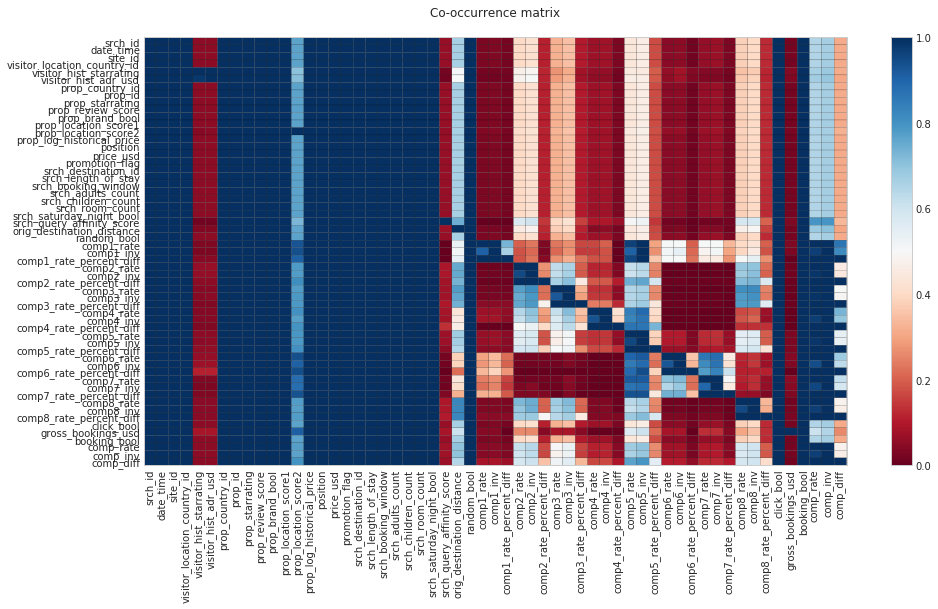

In [85]:
all_vars = list(expedia_df.keys())
all_vars.extend(['comp_rate','comp_inv','comp_diff'])
plot_coocurrance(sample_data, *all_vars) 

In [102]:
n = len(sample_data['comp_diff'])
vals= len([x for x in sample_data['comp_diff'] if not math.isnan(x)])
print(vals/n)

0.30198


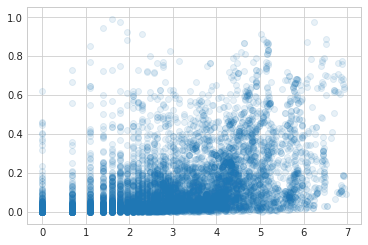

In [107]:
one_s = 'prop_location_score1'
two_s = 'prop_location_score2'
d = expedia_df.sample(10000)
x = d[one_s].values
y = d[two_s].values
plt.scatter(x,y, alpha=0.1)
plt.show()

In [ ]:
orig_destination_distance
#prop_location_score


    